In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# ravel()은 1차원 벡터로 만들어줌
np.random.seed(1)
X = np.random.rand(40, 1) ** 2
y = (10 - 1./ (X.ravel() + 0.1)) + np.random.randn(40)

In [5]:
from sklearn.model_selection import validation_curve

In [6]:
degree = np.arange(0, 21)

In [12]:
train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(degree = 2),\
                                                       LinearRegression()),\
                                                        X, y, "polynomialfeatures__degree", degree, cv = 5)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


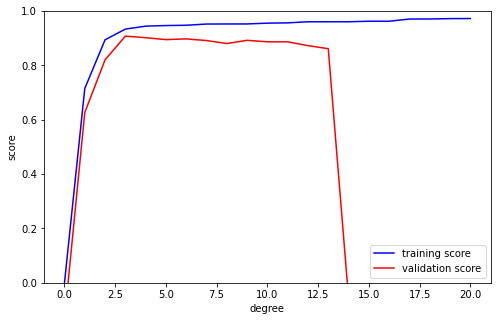

In [15]:
# (train_score, 1) = (train_score, axis = 1)

plt.figure(figsize = (8, 5))
plt.plot(degree, np.median(train_score, 1), 'b-', label = 'training score')
plt.plot(degree, np.median(val_score, 1), 'r-', label = 'validation score')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.legend(loc = 'best');

In [24]:
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)

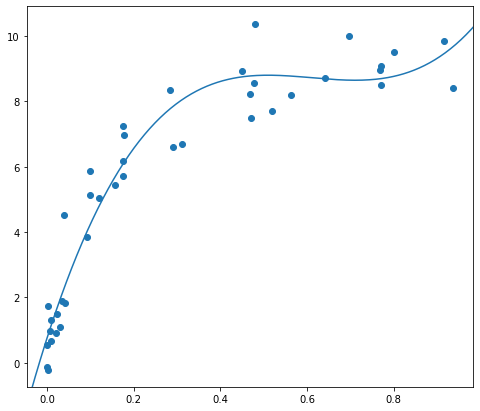

In [29]:
plt.figure(figsize = (8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = make_pipeline(PolynomialFeatures(degree = 3), LinearRegression()).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);

In [30]:
from sklearn.model_selection import learning_curve

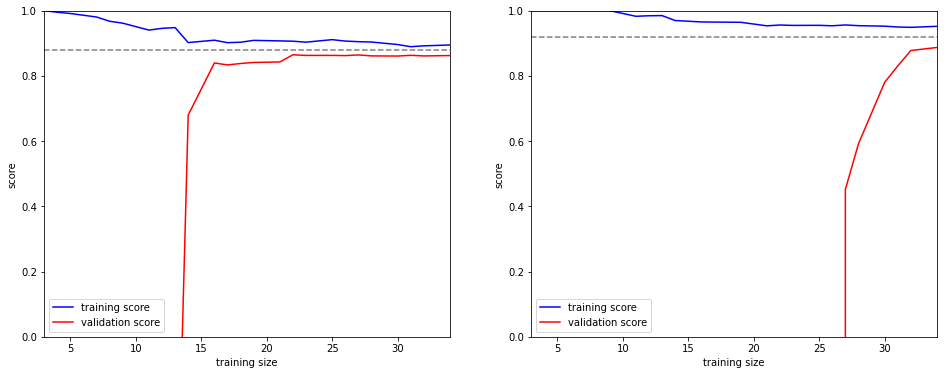

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

for i, degree in enumerate([2, 9]):
    n, train_lc, val_lc = learning_curve(make_pipeline(PolynomialFeatures(degree = degree),\
                                                      LinearRegression()),\
                                        X, y, cv = 7, train_sizes = np.linspace(0.1, 1, 25))
    
    ax[i].plot(n, np.mean(train_lc, 1), 'b-', label = 'training score')
    ax[i].plot(n, np.mean(val_lc, 1), 'r-', label = 'validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), n[0], n[-1], color = 'gray', linestyle = 'dashed')
    ax[i].set(xlim = (n[0], n[-1]), ylim = (0, 1), xlabel = 'training size', ylabel = 'score')
    ax[i].legend(loc = 'best');

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {'polynomialfeatures__degree': np.arange(21),
         'linearregression__fit_intercept': [True, False],
         'linearregression__normalize': [True, False]}

In [38]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(),\
                                 LinearRegression()), params, iid = True, cv = 7)

In [39]:
grid.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             iid=True,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [40]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [41]:
model = grid.best_estimator_
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

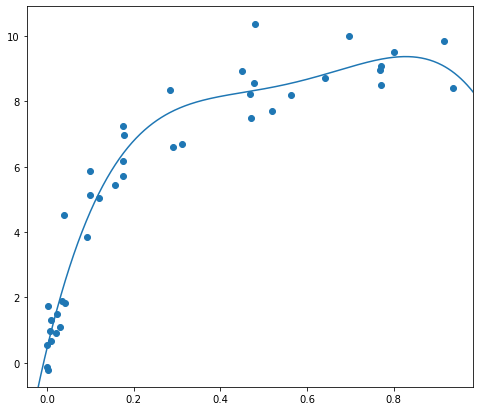

In [43]:
plt.figure(figsize = (8,7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_pred) # x축이 X_test.ravel(), y축이 y_pred
plt.axis(lim);

- 참고링크: https://www.youtube.com/watch?v=4FGDcIMcUZo